In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


จะสังเกตว่า Name กับ Sex เอามาคำนวณไม่ได้

In [6]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

<Axes: >

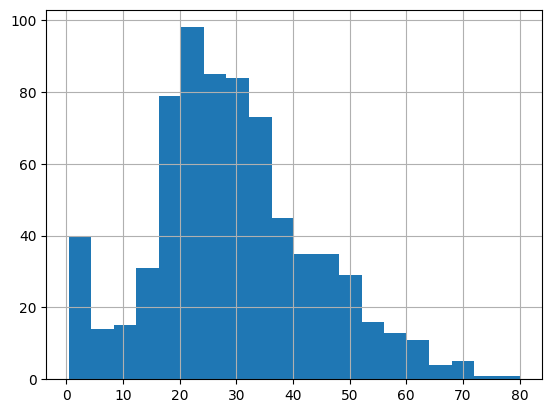

In [7]:
data['Age'].hist(bins=20)

In [9]:
data.nunique() # number of unique value

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
data[['Sex', 'SibSp']].nunique()

Sex      2
SibSp    7
dtype: int64

Text(0.5, 1.0, 'Cardinality')

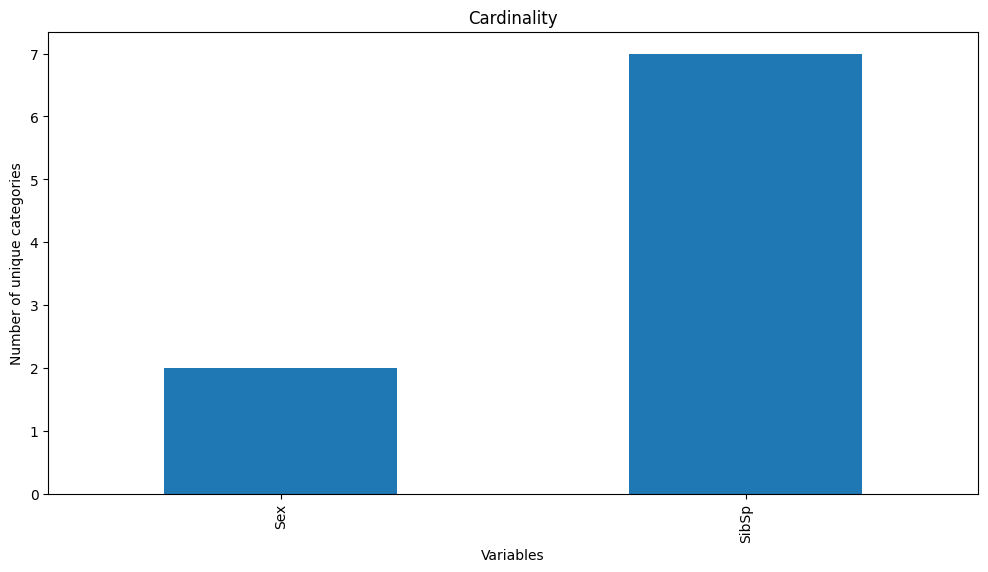

In [14]:
data[['Sex', 'SibSp']].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [16]:
data['Pclass'].unique()

array([3, 1, 2])

In [17]:
label_freq = data['Pclass'].value_counts() / len(data)
print(label_freq)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64


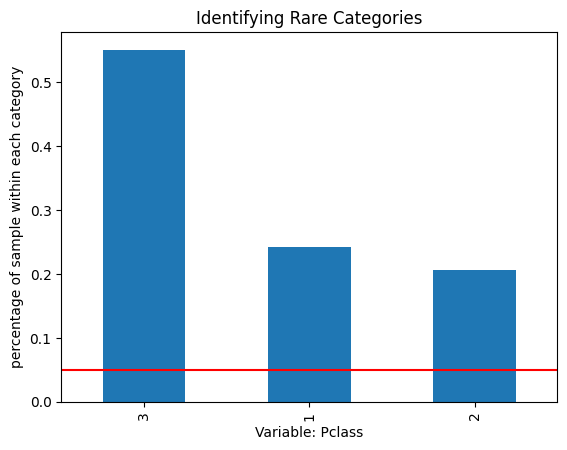

In [19]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red') #make a red line of 5%
fig.set_ylabel('percentage of sample within each category')
fig.set_xlabel('Variable: Pclass')
fig.set_title('Identifying Rare Categories')
plt.show()

##Identify a linear relationship between numerical variables

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [21]:
np.random.seed(29)
x = np.random.randn(200)
#• Create a y variable that is linearly related to x with some added random noise
y = x * 10 + np.random.randn(200) * 2

In [22]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 28.999999999999986, 'Independent variable')

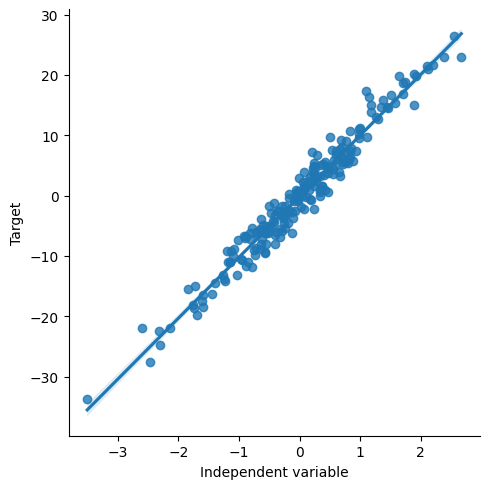

In [24]:
sns.lmplot(x="x", y="y", data=data, order=1)
# Polynomial order = 1 คือ linear function (เส้นตรงสีน้ำเงิน)
plt.ylabel("Target")
plt.xlabel("Independent variable")

In [25]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])
# ได้ Model ที่ Trained แล้วออกมา

LinearRegression()

In [26]:
# อยากรู้ว่ามีความสัมพันธ์ Linear แค่ไหน (ใกล้ 1 มีความสัมพันธ์มาก, ถ้าเป็น -1 คือความสัมพันธ์ตรงกันข้าม)
score = linreg.score(data['x'].to_frame(), data['y'])
print(score)

0.9609573273645812


<ipython-input-27-c468667c5250>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'], bins=30)


<Axes: xlabel='x', ylabel='Density'>

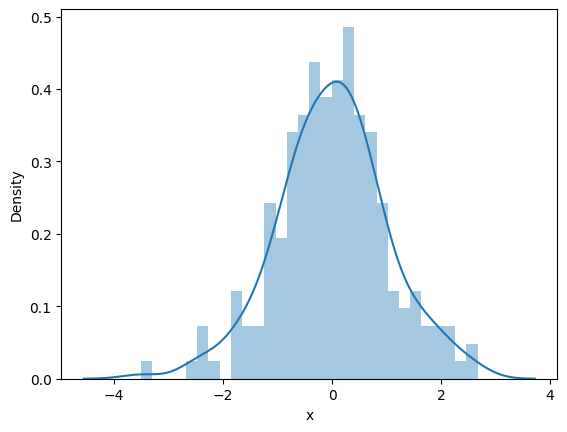

In [27]:
sns.distplot(data['x'], bins=30)
# ถ้ากำหนด density plot มาก เส้นก็จะโค้งมาก

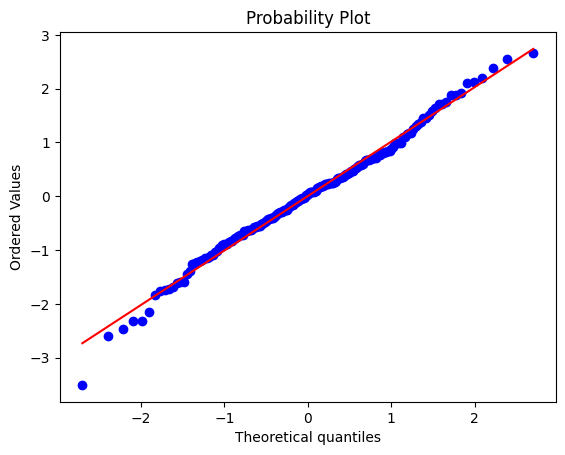

In [29]:
stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()
# ถ้าเส้นกับจุดไปตามกัน data นั้นจะมีการกระจายแบบ Normal Distribution แน่นอน